In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [117]:
df = pd.read_csv("Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [118]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [119]:
df.dropna(inplace=True)

In [120]:
df.shape

(263, 20)

In [121]:
df.shape

(263, 20)

In [122]:
df.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

In [123]:
X = df.iloc[:,[8,10]].values

In [124]:
def dendrogramOptimizer(data):
    sch.dendrogram(sch.linkage(data,method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean Distances')

In [125]:
def DetermineNoCluster(df):
    silh = []
    for i in range(2,11):
        model = AgglomerativeClustering(n_clusters = i)
        labels = model.fit_predict(df)
        score = silhouette_score(df,labels,metric="euclidean")
        silh.append(score)
    plt.bar(range(2,11),silh)

In [126]:
def hierarchialTrainer(n,data):
    hc = AgglomerativeClustering(n_clusters=n,affinity='euclidean',linkage='ward')
    hc_labels = hc.fit_predict(data)
    return (hc,hc_labels)

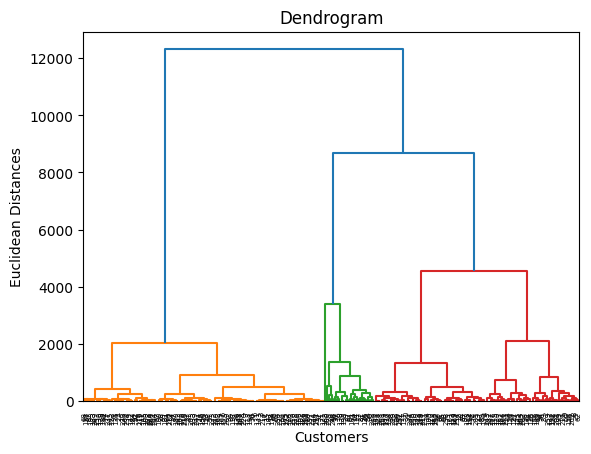

In [127]:
dendrogramOptimizer(X)

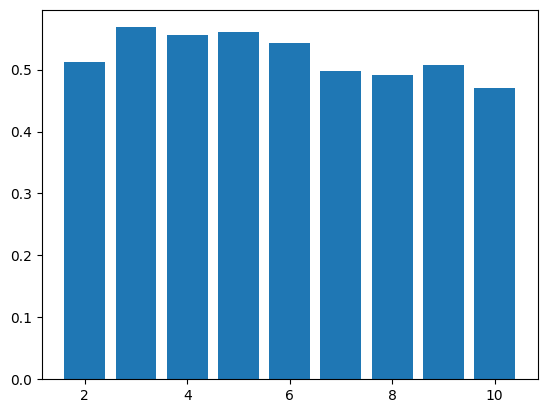

In [128]:
DetermineNoCluster(X)

In [129]:
hc , hc_labels = hierarchialTrainer(5,X)

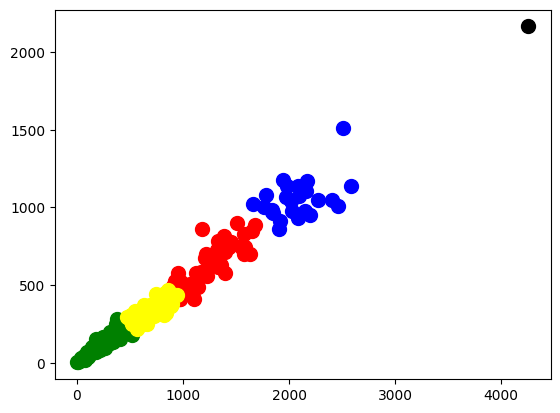

In [130]:
plt.scatter(X[hc_labels==0,0],X[hc_labels==0,1],s=100,color='red',label='Cluster 1')
plt.scatter(X[hc_labels==1,0],X[hc_labels==1,1],s=100,color='green',label='Cluster 2')
plt.scatter(X[hc_labels==2,0],X[hc_labels==2,1],s=100,color='blue',label='Cluster 3')
plt.scatter(X[hc_labels==3,0],X[hc_labels==3,1],s=100,color='yellow',label='Cluster 4')
plt.scatter(X[hc_labels==4,0],X[hc_labels==4,1],s=100,color='black',label='Cluster 5')